大作业

In [4]:
import pandas as pd
import numpy as np

一、导入数据

导入数据1，用sample()方法随机抽取5个样本数据预览。

In [6]:
data_1 = pd.read_csv('item-2018-06-01-2018-07-05.csv')
data_1.sample(5)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
373906,2018/6/8,A010,2,264715,214597,1.0,1.0,1.0,n,0.0
945587,2018/6/16,A016,1,88181,198366,1.0,10.9,12.5,p,-1.6
17215,2018/6/2,A004,2,108779,4903,1.0,18.8,24.9,p,-6.1
501656,2018/6/11,A004,2,113261,278,1.0,16.0,16.0,n,0.0
726900,2018/6/15,D007,3,262685,205437,1.0,8.9,11.9,p,-3.0


导入数据2，用sample()方法随机抽取5个样本数据预览。

In [7]:
data_2 = pd.read_csv('Basket-2018-06-01-2018-07-05.csv')
data_2.sample(5)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
451893,2018-06-08,A021,4,47830,20.85
22122,2018-06-14,A007,2,121222,38.79
152733,2018-06-04,D003,2,54020,2.90
303791,2018-06-13,D005,3,5630,24.50
168454,2018-06-12,D002,4,148399,4.70


用Info()方法查看数据1各字段数据类型.

In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   SDATE            1048575 non-null  object 
 1   STORE_CODE       1048575 non-null  object 
 2   POSID            1048575 non-null  int64  
 3   BASK_CODE        1048575 non-null  int64  
 4   PROD_CODE        1048575 non-null  int64  
 5   ITEM_QUANTITY    1048575 non-null  float64
 6   ITEM_SPEND       1048575 non-null  float64
 7   NORMAL_PRICE     1048575 non-null  float64
 8   DISCOUNT_TYPE    1048575 non-null  object 
 9   DISCOUNT_AMOUNT  1048575 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 80.0+ MB


用Info()方法查看数据1各字段数据类型.

In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SHOP_DATETIME  571552 non-null  object 
 1   STORE_CODE     571552 non-null  object 
 2   POS_NO         571552 non-null  int64  
 3   BASK_CODE      571552 non-null  int64  
 4   BASK_SPEND     571552 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.8+ MB


二、数据处理

删除数据1重复数据。

In [11]:
data_1 = data_1.drop_duplicates()

删除数据2重复数据。

In [12]:
data_2 = data_2.drop_duplicates()

数据1是否存在缺失值

In [13]:
data_1.isnull().any()
print(data_1.isnull().any())

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool


数据2是否存在缺失值

In [14]:
data_2.isnull().any()
print(data_2.isnull().any())

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool


In [15]:
data_1.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,919798.000000,919798.000000,919798.000000,919798.000000,919798.000000,919798.000000,919798.000000
mean,3.018145,161417.225990,115695.898499,1.530732,14.442620,15.748373,-2.078002
std,2.480789,85991.738441,81229.634561,8.792848,116.100263,25.560155,67.577646
min,1.000000,961.000000,19.000000,-120.000000,-870.000000,0.500000,-57600.000000
25%,1.000000,85034.000000,23460.000000,1.000000,4.000000,4.000000,-1.600000
50%,2.000000,169996.500000,124554.000000,1.000000,7.900000,8.700000,0.000000
75%,3.000000,219089.750000,196250.000000,1.000000,12.900000,16.800000,0.000000
max,20.000000,314827.000000,224745.000000,4020.000000,69120.000000,1980.000000,696.000000


删除数据1无效数据

In [17]:
r_1=data_1.loc[:,'ITEM_SPEND'] >0
data_1= data_1.loc[r_1,:]
r_2=data_1.loc[:,'ITEM_QUANTITY'] >0
data_1=data_1.loc[r_2,:]
data_1.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,918123.000000,918123.000000,918123.000000,918123.000000,918123.000000,918123.000000,918123.000000
mean,3.016386,161456.908379,115700.779317,1.536841,14.525912,15.703587,-2.047947
std,2.475197,85979.597365,81209.088022,8.794101,116.154551,25.466823,67.404537
min,1.000000,961.000000,19.000000,0.010000,0.250000,0.500000,-57600.000000
25%,1.000000,85077.000000,23460.000000,1.000000,4.000000,4.000000,-1.600000
50%,2.000000,170043.000000,124554.000000,1.000000,7.900000,8.600000,0.000000
75%,3.000000,219134.500000,196250.000000,1.000000,12.900000,16.800000,0.000000
max,20.000000,314827.000000,224745.000000,4020.000000,69120.000000,1980.000000,226.400000


In [18]:
data_2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


删除数据2无效数据

In [19]:
r_3=data_2.loc[:,'BASK_SPEND'] >0
data_2=data_2.loc[r_3,:]
data_2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,569797.000000,569797.000000,569797.000000
mean,2.994330,167572.136898,39.583197
std,2.502507,87224.915886,196.158166
min,1.000000,961.000000,0.010000
25%,1.000000,90673.000000,9.000000
50%,2.000000,177692.000000,20.000000
75%,3.000000,238933.000000,44.800000
max,20.000000,323914.000000,79920.000000


三、数据分析：

将两个表的列名统一

In [20]:
data_1.columns=['SDATE','STORE_CODE','POS_NO','BASK_CODE','PROD_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_TYPE','DISCOUNT_AMOUNT']
data_2.columns=['SDATE','STORE_CODE','POS_NO','BASK_CODE','BASK_SPEND']

（1）相关性分析

观察'ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'之间的相关关系

In [23]:
data_1[[
      'ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_AMOUNT'
      ]].corr()

,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
ITEM_QUANTITY,1.000000,0.356903,-0.020040,-0.150769
ITEM_SPEND,0.356903,1.000000,0.245812,-0.820671
NORMAL_PRICE,-0.020040,0.245812,1.000000,-0.078033
DISCOUNT_AMOUNT,-0.150769,-0.820671,-0.078033,1.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


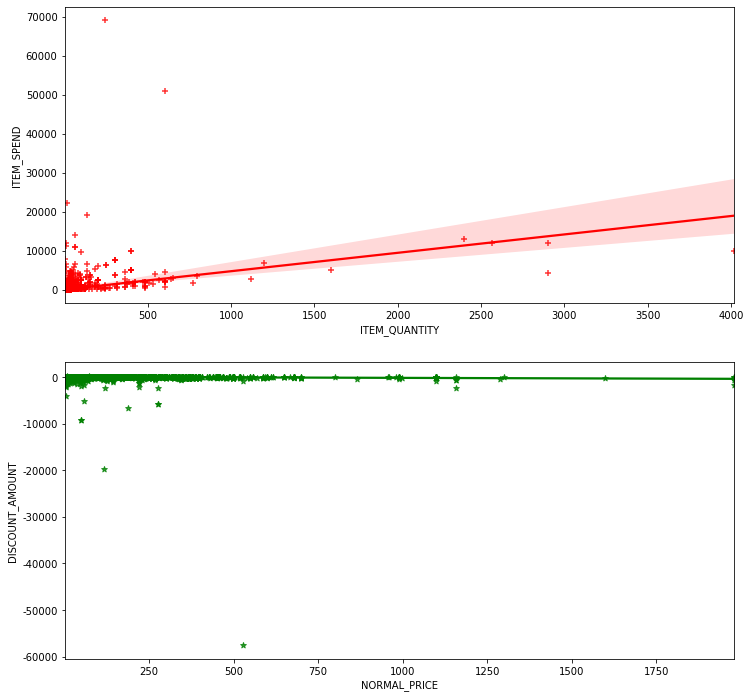

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题
fig,axes=plt.subplots(2,1,figsize=(12,12))
sns.regplot(x='ITEM_QUANTITY',y='ITEM_SPEND',data=data_1,color='r',marker='+',ax=axes[0])
sns.regplot(x='NORMAL_PRICE',y='DISCOUNT_AMOUNT',data=data_1,color='g',marker='*',ax=axes[1])

（2）计算统计量（商店个数、销售次数、销售金额、日销售金额、日平均销售金额、次平均销售金额）

统计商店个数，从数据1、数据2得到相同结果。

In [25]:
store_num_1=data_1.drop_duplicates(subset=['STORE_CODE'])
store_num_1.shape[0]

24

In [26]:
store_num_2=data_2.drop_duplicates(subset=['STORE_CODE'])
store_num_2.shape[0]

24

可得：商店个数：24

统计从6月1号至7月5号各个商店的销售次数

In [27]:
a=data_2['STORE_CODE'].value_counts()
a

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

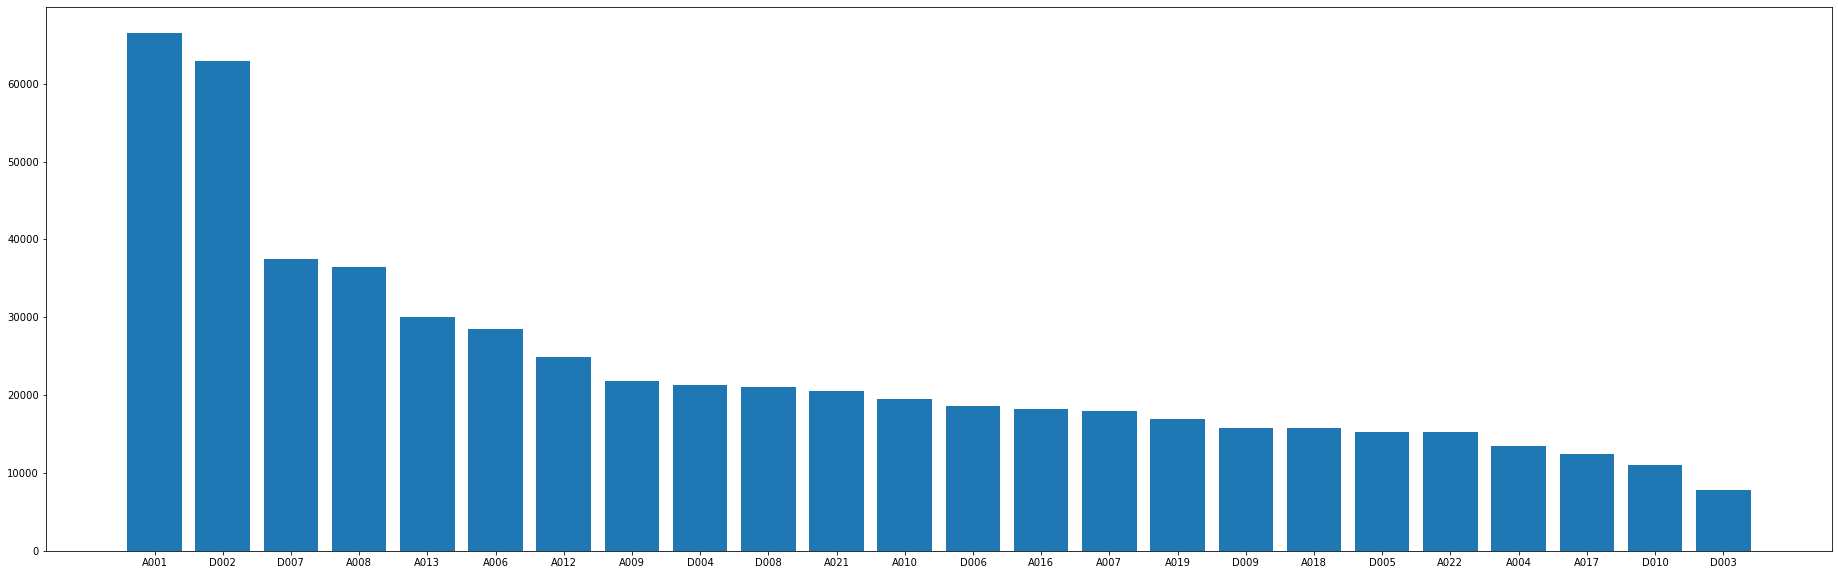

In [29]:
plt.bar(a.index, a.values)
plt.rcParams['figure.figsize'] = (19.0, 10.0)
plt.show()

统计从6月1号至7月5号各个商店的销售金额

In [30]:
from pandas import to_datetime
groupdata_2=data_2
groupdata_2.SDATE=to_datetime(groupdata_2.SDATE,format="%Y/%m/%d")
groupdata_2.head()

,SDATE,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [31]:
groupdata_2.sort_values(by='SDATE', inplace=True)

In [32]:
groupdata_2_1 = groupdata_2.groupby(groupdata_2.STORE_CODE)
groupdata_2_1

In [33]:
groupdata_2_2 = groupdata_2_1.sum()
groupdata_2_2.head()

,POS_NO,BASK_CODE,BASK_SPEND
STORE_CODE,,,
A001,362297,11569109746,3.478348e+06
A004,27594,1522658556,5.156631e+05
A006,65559,8042653934,9.439233e+05
A007,36558,2042843270,6.938853e+05
A008,93968,7748221557,1.324641e+06


In [34]:
groupdata_2_2.sort_values("BASK_SPEND",ascending=False,inplace=True)
groupdata_2_2.head()

,POS_NO,BASK_CODE,BASK_SPEND
STORE_CODE,,,
A001,362297,11569109746,3.478348e+06
D002,362228,8181180122,3.177385e+06
D007,90900,8030277804,1.382203e+06
A008,93968,7748221557,1.324641e+06
A013,110035,5133025011,1.126551e+06


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


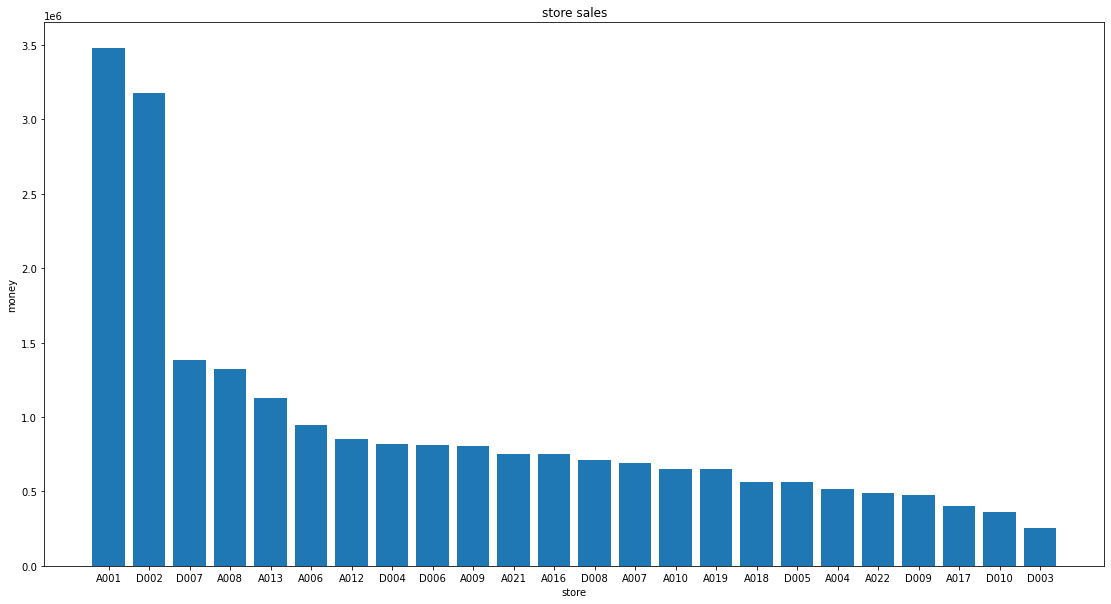

In [35]:
from pylab import mpl
plt.bar(groupdata_2_2.index,groupdata_2_2['BASK_SPEND'])
plt.title('store sales')
plt.xlabel('store')
plt.ylabel('money')
plt.rcParams['figure.figsize'] = (19.0, 10.0)
plt.show()

可得：对比销售次数图和销售金额图，发现商店的排序基本一致，符合一般实际销售情况。

统计从6月1号至7月5号商店每天的销售金额，并进行排序

In [36]:
groupdata_2_3 = groupdata_2.groupby(groupdata_2.SDATE)
groupdata_2_3

In [37]:
day_sales = groupdata_2_3.sum()

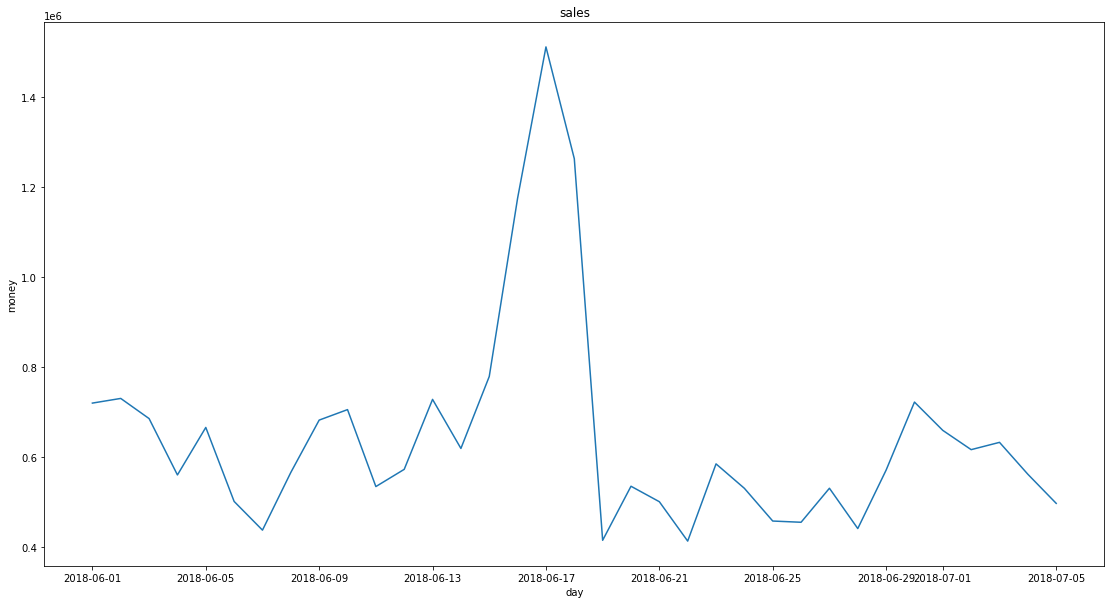

In [38]:
from pylab import mpl
plt.plot(day_sales['BASK_SPEND'])
plt.title('sales') 
plt.xlabel('day')
plt.ylabel('money')
plt.rcParams['figure.figsize'] = (32.0, 10.0)
plt.show()

可得；从上图可以看出商店每天销售金额的变化。

统计日平均销售金额

In [39]:
AllMoney = data_2.loc[:,'BASK_SPEND'].sum()

In [40]:
day_sum= data_2.drop_duplicates(subset=['SDATE'])
days = day_sum.shape[0]
days

35

In [41]:
sales_per_day=AllMoney//days
sales_per_day

644411.0

统计次平均售卖金额

In [43]:
spend_times=data_2.shape[0]
spend_per_time=AllMoney//spend_times
spend_per_time

39.0

（3）统计量分布

统计销售量前十

In [46]:
product_quantity_sort = data_1.groupby('PROD_CODE')['BASK_CODE'].count().sort_values(ascending=False)
print(product_quantity_sort.head(10))

PROD_CODE
194690    6810
21835     6589
72811     5104
205540    4468
75283     4014
219118    3890
197532    3711
205437    3594
216571    3320
178462    3209
Name: BASK_CODE, dtype: int64


统计销售金额前十

In [49]:
product_amount_sort = data_1.groupby('PROD_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(product_amount_sort.head(10))

PROD_CODE
7137      236511.00
136839    207763.00
7133      180327.50
149413    124727.71
154900    101363.20
220834     93843.06
1239       84235.00
88160      82399.40
220320     70800.00
11929      70037.40
Name: ITEM_SPEND, dtype: float64


产品价格分布

In [50]:
prices = []
for price in data_1['ITEM_SPEND']:
    if 0 <= price < 20:
        prices.append(1)  #  
    elif 20 <= price < 50:
        prices.append(2)  # 
    elif 50 <= price < 100:
        prices.append(3)  #
    elif 100 <= price < 500:
        prices.append(4)  #
    elif 500 <= price < 1000:
        prices.append(5)  #
    elif 1000 <= price < 2000:
        prices.append(6)  #
    elif 2000 <= price:
        prices.append(7)  #
        
data_1['price'] = pd.DataFrame(prices)

Text(0, 0.5, '价格')

/Users/songdongfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/songdongfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/songdongfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/songdongfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/songdongfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/songdongfeng/opt/anacon

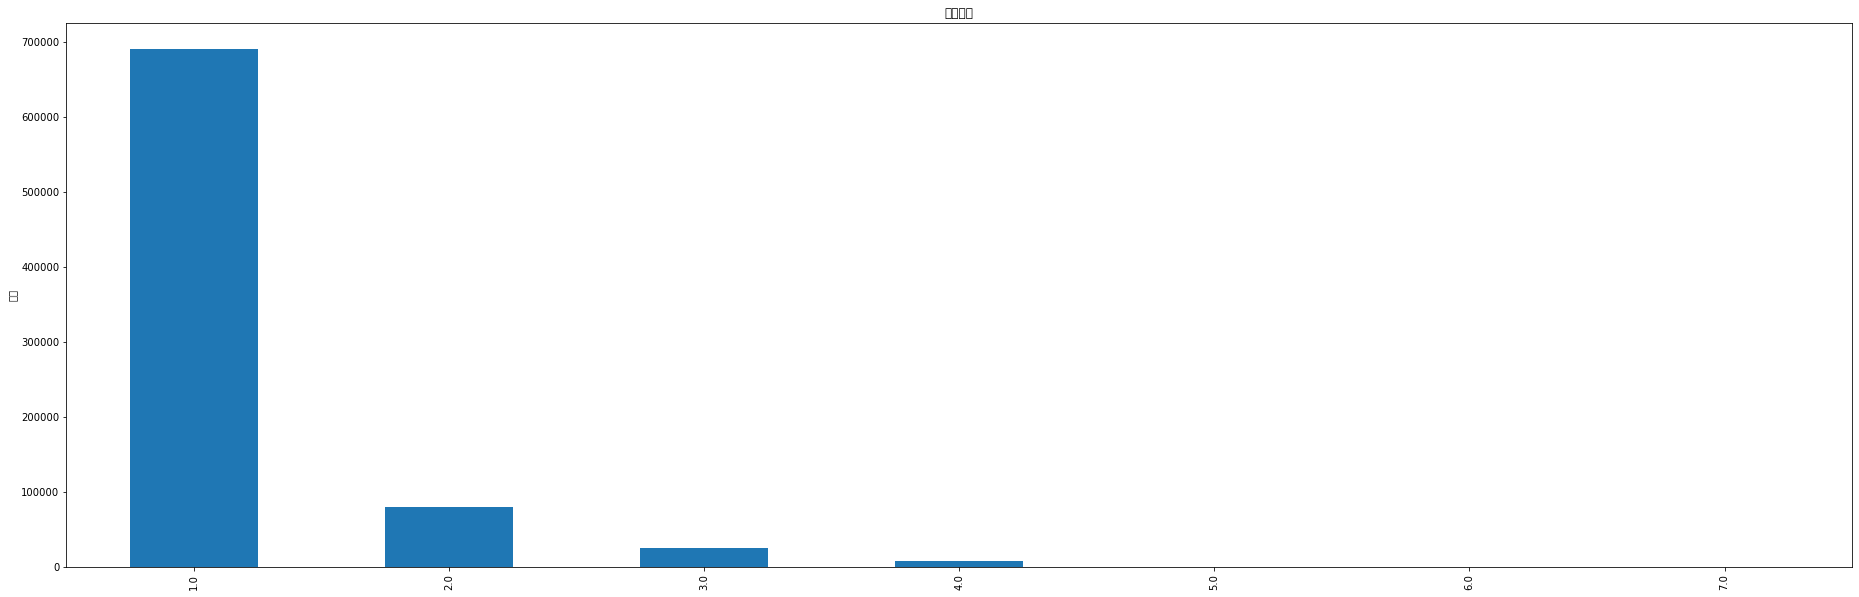

In [51]:
data_1.price.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"分布情况") # 标题
plt.ylabel(u"价格")  

产品折扣分布

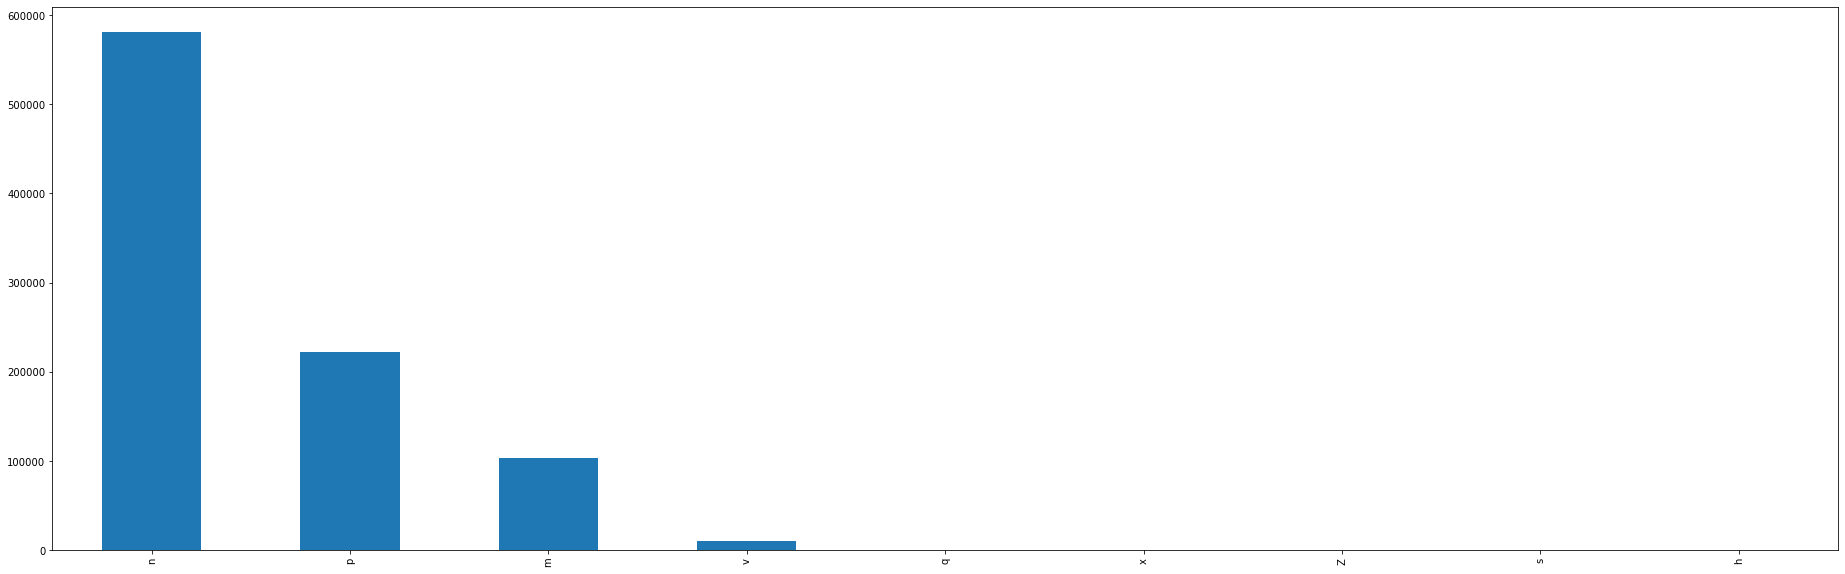

In [53]:
data_1.DISCOUNT_TYPE.value_counts().plot(kind='bar')